# Анализ датасета спортивных сооружений на 2016 год

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline 

In [82]:
Register = pd.read_csv('ReestrSport1.csv')

In [204]:
Register.head()

Name Activity  \
0                        Indoor swimming pool        Y   
1                          Futsal sports hall        Y   
2                           Ice sports palace        Y   
3                               Sports center        Y   
4  Sports Centre with Multipurpose Sports Gym        Y   

                              SF           Locality  \
0  Khanty-Mansi Autonomous Okrug           Sovetsky   
1  Khanty-Mansi Autonomous Okrug           Langepas   
2  Khanty-Mansi Autonomous Okrug             Surgut   
3  Khanty-Mansi Autonomous Okrug  settlement Lykhma   
4  Khanty-Mansi Autonomous Okrug           Langepas   

                                             Address       Actions  \
0  628240, Khanty-Mansiysk-Yugra, the Soviet dist...  construction   
1  Khanty-Mansi Autonomous Okrug-Yugra, Langepas ...  construction   
2  628403, Tyumen region, the Khanty - Mansiysk A...  construction   
3  Build. 39-À, Lyhma, Beloyarsky region, Khanty-...  construction   
4                            47 Lenin str., Langepas  construction   

   First_date Second_date  Total_financing  Federal_financing  ...  \
0  01.12.2006  31.12.2008        147105000           10000000  ...   
1  01.06.2007  30.12.2009         83829000           17500000  ...   
2  01.06.2008  05.11.2011        814724600           90000000  ...   
3  15.12.2006  24.12.2009        212165000           60000000  ...   
4  14.01.2008  30.12.2011        143946000           17500000  ...   

   District_financing  Other_financing                    Type_complex  \
0           4261000.0                0                   swimming pool   
1           3315000.0                0                     sports hall   
2         587035000.0        129396500                       ice arena   
3           1519000.0                0  multifunctional sports complex   
4          12388000.0                0  multifunctional sports complex   

  X_coordinate  Y_coordinate  Photo  Video  Panoramas  Webcasts:  \
0      63.5594       61.3740     24      0          0          0   
1      75.1796       61.2569     18      0          0          0   
2      73.3774       61.2381     16      0          0          0   
3      66.9466       63.2185     10      0          0          0   
4      75.1941       61.2447     16      0          0          0   

   Other_materials  
0                1  
1                0  
2                0  
3                0  
4                0  

[5 rows x 21 columns]

In [28]:
Register.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                902 non-null    object 
 1   Activity            928 non-null    object 
 2   SF                  928 non-null    object 
 3   Locality            899 non-null    object 
 4   Address             658 non-null    object 
 5   Actions             928 non-null    object 
 6   First_date          705 non-null    object 
 7   Second_date         830 non-null    object 
 8   Total_financing     928 non-null    int64  
 9   Federal_financing   928 non-null    int64  
 10  Subject_financing   928 non-null    float64
 11  District_financing  928 non-null    float64
 12  Other_financing     928 non-null    int64  
 13  Type_complex        925 non-null    object 
 14  X_coordinate        927 non-null    float64
 15  Y_coordinate        927 non-null    float64
 16  Photo   

### Кол-во активных и закрытых спортивных сооружений (Y - активен , N - зыкрыт)

In [34]:
Aсtive_facilities = Register.Activity.value_counts()

In [35]:
Aсtive_facilities

Y    847
N     81
Name: Activity, dtype: int64

<AxesSubplot:>

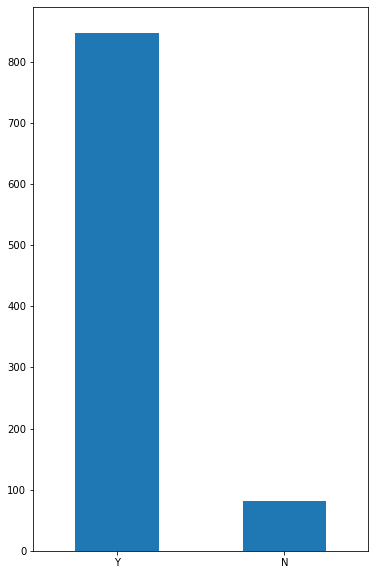

In [39]:
Aсtive_facilities.plot.bar(x= 'Activity', y='Count', rot=0, figsize = (6,10))

### Топ 10 регионов по кол-ву активных спортивных сооружений

In [200]:
Top_sf_by_facilities = Register.query('Activity == "Y"') \
    .groupby('SF', as_index = False) \
    .agg({'Name':'count'}) \
    .rename(columns={'Name': 'Number_of_facilities'}) \
    .sort_values('Number_of_facilities', ascending=False) 

In [190]:
Top_sf_by_facilities.head(10)

SF  Number_of_facilities
66  The Republic of Mordovia                    41
78           Voronezh region                    23
40              Penza region                    22
9           Chuvash Republic                    22
41               Perm region                    21
22          Krasnodar region                    21
37               Omsk region                    20
38           Orenburg region                    19
51     Republic of Tatarstan                    19
61             Tambov Region                    18

### Регионы с активными сооружениями и показателем выше среднего по стране.

In [205]:
Top_sf_by_facilities['Above_median'] = \
Top_sf_by_facilities.Number_of_facilities > round(Top_sf_by_facilities.Number_of_facilities.mean(),2)

In [211]:
Top_sf_by_facilities.query('Above_median == 1')

SF  Number_of_facilities  Above_median
66        The Republic of Mordovia                    41          True
78                 Voronezh region                    23          True
40                    Penza region                    22          True
9                 Chuvash Republic                    22          True
41                     Perm region                    21          True
22                Krasnodar region                    21          True
37                     Omsk region                    20          True
38                 Orenburg region                    19          True
51           Republic of Tatarstan                    19          True
61                   Tambov Region                    18          True
31                   Moscow region                    17          True
29                Mari El Republic                    17          True
70                     Tver region                    17          True
53                   Ryazan Oblast                    15          True
52                   Rostov region                    15          True
46  Republic of Kabardino-Balkaria                    14          True
67  The Republic of Sakha (Yakutia                    14          True
81                Zabaykalsky Krai                    14          True
5                  Belgorod region                    14          True
36              Novosibirsk region                    13          True
34          Nizhny Novgorod Region                    13          True
26                Leningrad region                    13          True
57                 Smolensk region                    12          True
59                Stavropol region                    12          True
14                   Kaluga region                    12          True
69                     Tula region                    12          True
64      The Republic of Ingushetia                    11          True
72                   Tyva Republic                    11          True
10                  Irkutsk region                    11          True
25                    Kursk region                    11          True

### Топ 10 регионов с наибольшим финансированием сооружений

In [41]:
Register.groupby('SF', as_index=False) \
    .agg({'Total_financing':'sum',}) \
    .sort_values('Total_financing', ascending=False) \
    .head(10)

SF  Total_financing
31             Moscow region      17472989383
72               Tver region       9295777400
22          Krasnodar region       8270212902
68  The Republic of Mordovia       7105696895
41               Perm region       6988650457
60            St. Petersburg       5863803390
59           Smolensk region       5392958700
23        Krasnoyarsk region       4865953000
26          Leningrad region       4552093978
61          Stavropol region       4329600320

<AxesSubplot:xlabel='SF'>

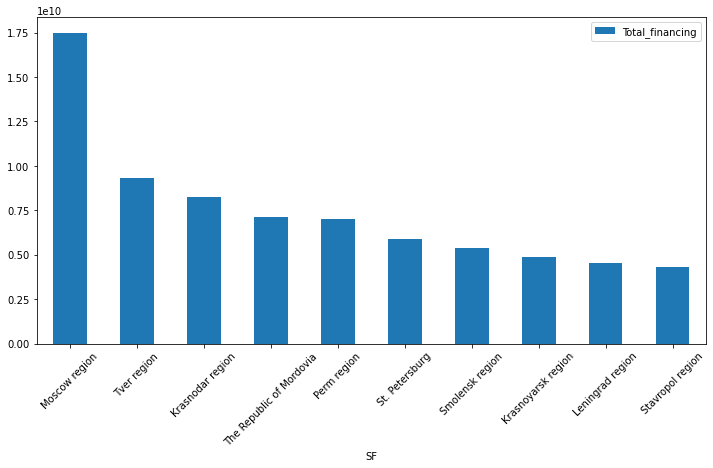

In [32]:
Register.groupby('SF', as_index=False) \
    .agg({'Total_financing':'sum'}) \
    .sort_values('Total_financing', ascending=False) \
    .head(10).plot.bar(x='SF', rot=45,figsize = (12,6))

### Наиболее финансируемы регионы федеральным бюджетом 

In [44]:
Financing_by_sf = Register.groupby('SF', as_index=False) \
    .agg({'Type_complex':'count','Total_financing':'sum','Federal_financing':'sum'}) \
    .sort_values('Total_financing', ascending=False) 

In [49]:
Financing_by_sf['Federal_financing_percent'] = round((Financing_by_sf.Federal_financing*100)/Financing_by_sf.Total_financing,2)

In [58]:
Financing_by_sf.sort_values('Federal_financing_percent', ascending= False).head(10)

SF  Type_complex  Total_financing  \
81  Yamalo-Nenets Autonomous Okrug             1         18000000   
69  The Republic of Sakha (Yakutia            16       3424222200   
33      Nenets Autonomous District             5         81220300   
43                    Pskov region             4        510532000   
40                    Penza region            22       1020120000   
9                 Chuvash Republic            25       1253894100   
67       The Republic of Khakassia             7        288072205   
31                   Moscow region            18      17472989383   
2                      Amur region             5        243921000   
30                          Moscow             8       1211941000   

    Federal_financing  Federal_financing_percent  
81           18000000                     100.00  
69         3424222200                     100.00  
33           81220300                     100.00  
43          510532000                     100.00  
40         1020120000                     100.00  
9          1253206000                      99.95  
67          278782000                      96.78  
31        16762123000                      95.93  
2           223421000                      91.60  
30         1098588000                      90.65

### Визуализация не включает Московскую область ввиду огромной разницы в бюджетах

<AxesSubplot:xlabel='SF'>

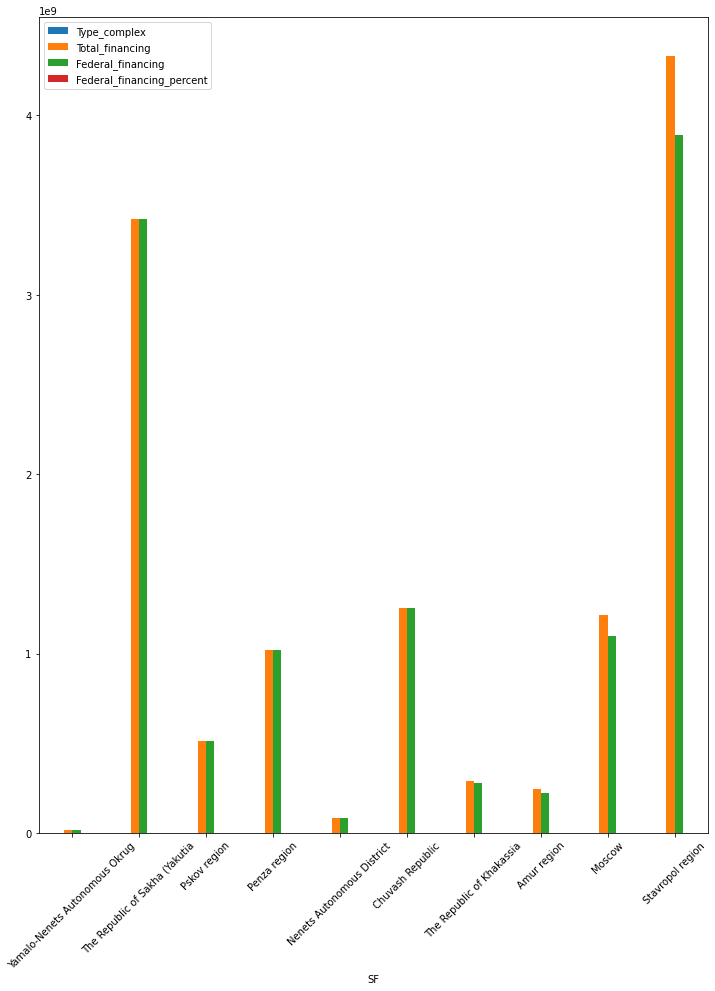

In [63]:
Financing_by_sf.query('SF != "Moscow region"') \
    .sort_values('Federal_financing_percent', ascending= False).head(10) \
    .plot.bar(x='SF', rot=45,figsize = (12,15))

### Топ долгостроев

In [89]:
Register.First_date = pd.to_datetime(Register.First_date, errors = 'coerce')
Register.Second_date = pd.to_datetime(Register.Second_date, errors = 'coerce')

In [90]:
Register['Сonstruction_time'] = Register.Second_date - Register.First_date

In [100]:
Register.sort_values('Сonstruction_time',ascending=False) \
    .query('Actions != "reconstruction"') \
    .head(10)

Name Activity  \
92   Universal sports and entertainment  complex «B...        Y   
310                           Universal sports complex        Y   
769  Gymnasium in Kostroma Commerce and Economic Co...        Y   
373             The republican sports complex «Kurgan»        Y   
697                                      Rugby stadium        Y   
384                                      Sports Palace        Y   
142                              Sports Center «Olimp»        Y   
610                                      Sports center        Y   
766                              Winter sports complex        Y   
255                     Artificial turf football field        Y   

                                  SF                Locality  \
92                      Kirov region                   Kirov   
310         The Republic of Dagestan             Makhachkala   
769                  Kostroma region                Kostroma   
373              Republic of Karelia            Petrozavodsk   
697                    Moscow region          Monino village   
384  Republic of Karachay-Cherkessia        village Uchkeken   
142                    Samara Region                Sukhodol   
610                 Krasnodar region            Belorechensk   
766                  Kemerovo region          Mezhdurechensk   
255        The Republic of Khakassia  Vershina Tyoya village   

                                               Address       Actions  \
92                   46 Mira str., Kirov, Kirov region  construction   
310                                                NaN  construction   
769                                                NaN  construction   
373  The Republic of Karelia, Petrozavodsk, Kurgan ...  construction   
697         Shchelkovsky municipal district, GP Monino  construction   
384  The Republic of Karachay-Cherkessia, village U...  construction   
142  8 Kuybysheva str., Sukhodol, Sergeyevsky area,...  construction   
610                                                NaN  construction   
766                                                NaN  construction   
255  Republic of Khakassia, the settlement Top Tei ...  construction   

    First_date Second_date  Total_financing  Federal_financing  ...  \
92  1991-01-14  2012-12-25        323946300          100000000  ...   
310 2002-01-15  2018-12-30        426441000          255000000  ...   
769 2003-01-13  2015-12-28         23682000           17200000  ...   
373 2004-05-01  2015-12-30        123600000          110000000  ...   
697 2005-10-01  2016-12-30        798270000          242500000  ...   
384 2003-01-13  2014-03-10        150090000          111000000  ...   
142 2001-01-16  2011-11-10        364617000           10000000  ...   
610 2004-01-01  2014-08-21        351130000          100000000  ...   
766 2006-06-02  2016-12-31         37800000           31000000  ...   
255 2010-11-01  2020-12-28        226000000          226000000  ...   

     Other_financing                    Type_complex  X_coordinate  \
92                 0  multifunctional sports complex       49.6094   
310                0  multifunctional sports complex       47.4989   
769                0                     sports hall       40.9369   
373                0            biathlon ski complex       34.3491   
697                0                         stadium       38.1953   
384                0  multifunctional sports complex       42.5155   
142                0  multifunctional sports complex       51.2184   
610         70000000  multifunctional sports complex       39.8786   
766                0                     ski complex       88.0874   
255                0  multifunctional sports complex       89.5675   

    Y_coordinate  Photo  Video  Panoramas  Webcasts:  Other_materials  \
92       58.6114     57     20          0          0                3   
310      42.9640     18      0          0          0                0   
769      57.7656      3      0          0 